# Segmentation quality assurance

In [31]:
from skimage.io import imread
import napari
from the_segmentation_game import metrics
import pyclesperanto_prototype as cle

In [4]:
gt = imread("../../imgs/tp7_channel1_rescaled(256x256x103)_gt.tif")
segmentation = imread("../../imgs/tp7_channel1_rescaled(256x256x103)_voronoi_otsu_label_image.tif")

In [5]:
viewer = napari.Viewer()

Validation errors in config file(s).
The following fields have been reset to the default value:

schema_version
  value is not a valid tuple (type=type_error.tuple)



In [6]:
viewer.add_image(gt, name = 'Ground truth')
viewer.add_image(segmentation, name = 'Segmentation result')

<Image layer 'Segmentation result' at 0x231b3b61fa0>

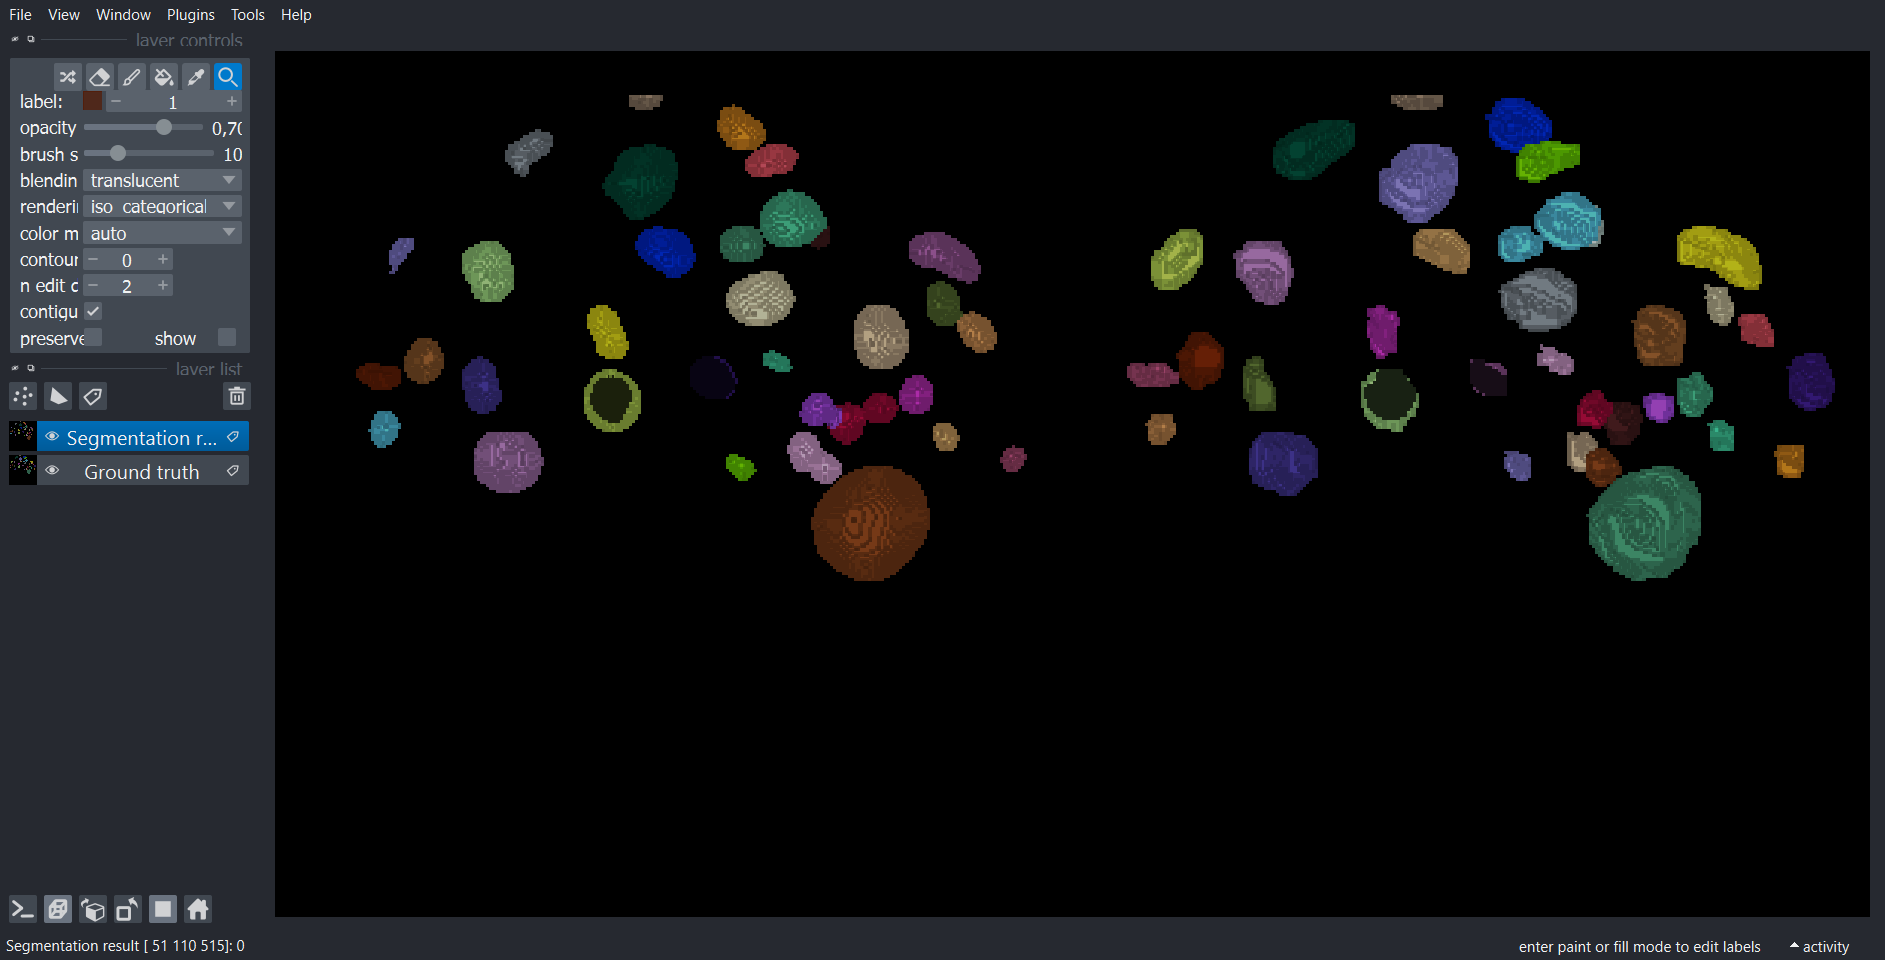

In [7]:
napari.utils.nbscreenshot(viewer)

In [37]:
threshold = 1
gt_binary = gt >= threshold
segmentation_binary = segmentation >= threshold

In [38]:
viewer.add_image(gt_binary, name = 'Binary ground truth')
viewer.add_image(segmentation_binary, name = 'Binary segmentation result')

<Image layer 'Binary segmentation result' at 0x231c4b35df0>

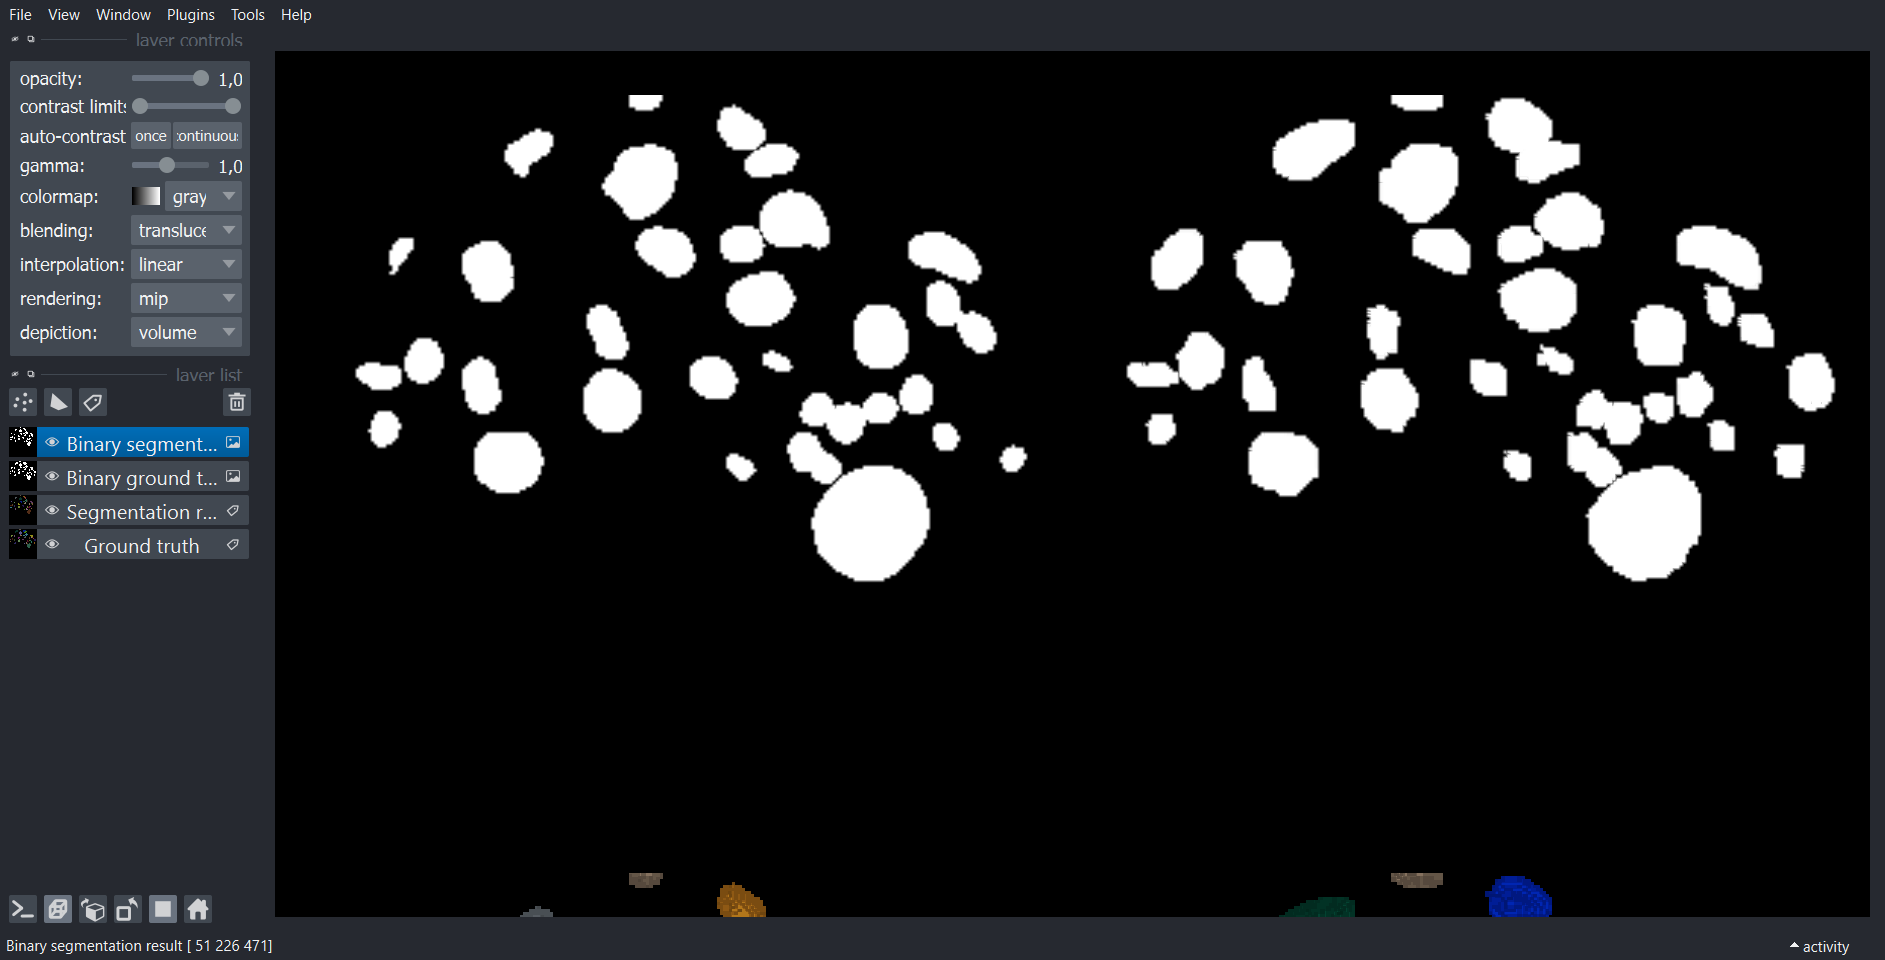

In [39]:
napari.utils.nbscreenshot(viewer)

In [43]:
gt_binary

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

## Jaccard index

In [10]:
metrics.jaccard_index_sparse(gt,segmentation)

0.5548284602058087

In [23]:
metrics.compute_tp_tn_fp_fn(gt,segmentation)

(92591.0, 6619570.0, 18165.0, 19882.0)

## Confusion matrix

In [41]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

In [42]:
confusion_matrix = metrics.confusion_matrix(gt_binary,segmentation_binary)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

ValueError: unknown is not supported

In [ ]:
metrics.confusion

## Accuracy, Precision, Recall, F1-Score, ...

In [12]:
metrics.confusion_matrix?

Signature:
metrics.confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels